#### **Scikit-learn 실습**

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
print(load_diabetes()['DESCR']) #description 출력

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
## 데이터프레임은 정규분포를 따른다.
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [7]:
all_variables = pd.concat([X, y], axis = 1)
all_variables

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
# 각각의 열에 대한 성분값 표기
all_variables.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


array([<Axes: title={'center': '-0.044641636506989144'}>,
       <Axes: title={'center': '0.05068011873981862'}>], dtype=object)

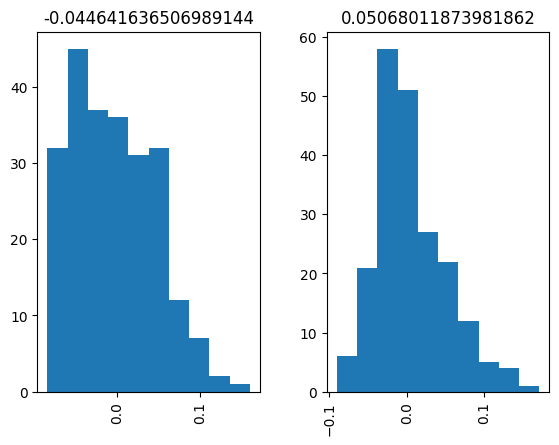

In [6]:
# bmi를 성별에 따라 histogram으로 그린다.
all_variables.hist(column = "bmi", by = "sex")

In [13]:
## 선형모델 사용
from sklearn.linear_model import LinearRegression

X = X[["age", "bmi"]] # feature값으로 2개의 필드만 가져옴
lin_reg = LinearRegression() # 선형회귀 모델 지정

lin_reg.fit(X, y) # 학습 수행

new_data = [[0, 0], [0.5, 0.3]] # 새로운 데이터 입력
lin_reg.predict(new_data) # 예측 수행

array([152.13348416, 496.0852863 ])

In [14]:
## Train, Test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) # test size는 default로 0.25로 설정됨
X_train.shape ## 331개의 데이터 수와 2개의 feature 적용

(331, 2)

In [15]:
X_test.shape

(111, 2)

In [36]:
lin_reg_mse = LinearRegression()

lin_reg_mse.fit(X_train, y_train) # train data에 대한 학습 수행

LinearRegression()

In [19]:
## 정확도 검증 (성능 평가)
from sklearn.metrics import mean_squared_error

y_pred = lin_reg_mse.predict(X_test)
y_pred

array([180.28340813, 210.65974021, 116.74642028,  87.38110578,
       137.21716721, 152.44200417, 166.67042527, 150.44917244,
       120.99591439,  61.47396006, 154.88915537,  68.75667354,
       198.89307203, 169.68904292, 153.86336945, 163.66640933,
       182.74516104, 213.12149313, 155.84159946, 135.51736957,
       224.74164426, 150.83015008, 189.70547038,  63.97968475,
       194.8634368 , 153.58493708, 124.77648732, 210.70371199,
        85.66670642,  98.34184692, 187.6246951 , 162.52347642,
       157.87840296, 215.67118959, 139.73749362, 135.81040366,
       155.70968413, 122.05090375, 181.27982399, 217.8838802 ,
       112.10134682, 146.68320124, 116.4533862 , 129.74396492,
        87.65953815, 132.61606553, 136.11820608, 202.23409383,
       175.56499284, 195.88922272, 131.86871197, 101.14060569,
       126.43231318, 134.22791962, 208.00749848, 173.61613288,
       143.16645897, 149.17432421, 123.73609968, 185.1775439 ,
       132.0006273 , 150.68363304, 116.21892561, 224.27

In [20]:
mse = mean_squared_error(y_pred, y_test) # 실제값과 예측값에 대한 정확도 측정
mse

3549.2419553180866

In [23]:
rmse = np.sqrt(mse)
print("실제값과 예측값 간의 실제적 오차 : ", rmse)

실제값과 예측값 간의 실제적 오차 :  59.57551472977877


#### **시각화 실습** (Matplotlib)

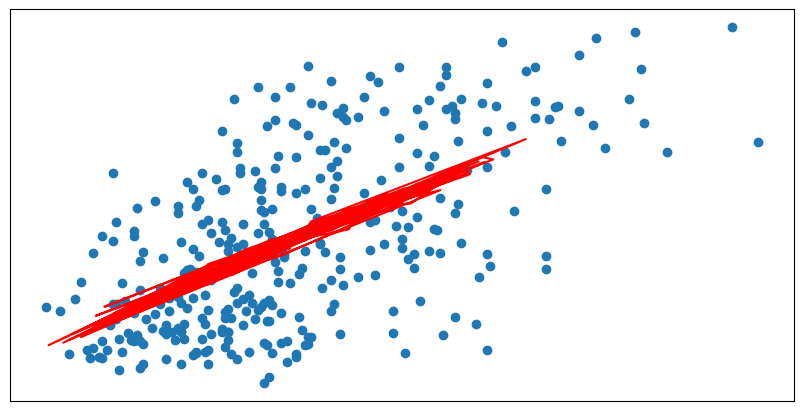

In [34]:
import matplotlib.pyplot as plt

plt.style.use("_mpl-gallery")

# plot 그리기
fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(X_train["bmi"], y_train, linewidths = 1) # 산점도로 나타냄
ax.plot(X_test["bmi"], y_pred, color = "red")

# plt 축 눈금 표시 -> 설정을 안하는 것 같음
plt.xticks(()) 
plt.yticks(())

plt.show()